50 yoshli erkak uchun sistolik qon bosim   120 mm - 140 mm simob ustuni bo'lsa normal
diastolik 80 - 90  mm simob ustuni normal hisoblandi
yurak urishlar soni 80 - 100  ta
1 - kasallik yo'q
0 - kasallik bor

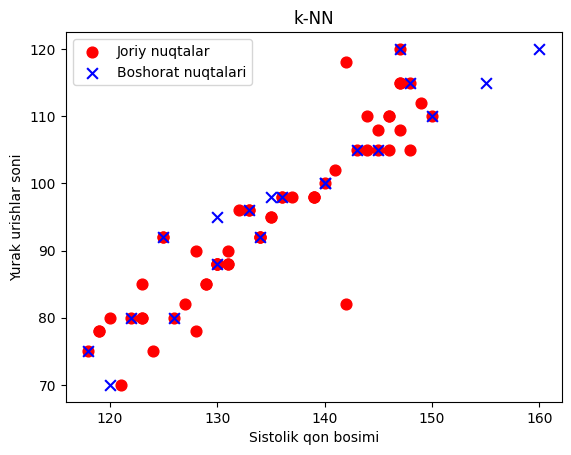

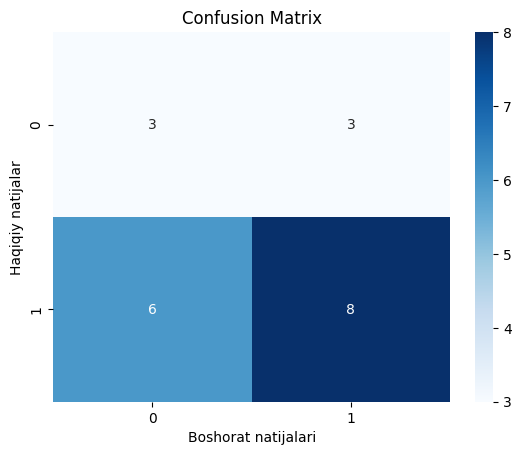

Natijalar: [1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0]
Accuracy: 0.55


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Ma'lumotlarni olish
data_set = pd.read_csv('data.csv')
X = data_set.iloc[:, [1, 2, 3]].values
Y = data_set.iloc[:, -1].values

# k-NN modelini yaratish va o'rgatish
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X, Y)

# Joriy nuqtalarni chizish
plt.scatter(X[:, 0], X[:, 2], color='red', s=60, label='Joriy nuqtalar')

# Boshorat qiymatini kiritish
predict_values = np.array([
    [120, 80, 70],
    [140, 90, 100],
    [160, 100, 120],
    [130, 85, 95],
    [150, 95, 110],
    [125, 82, 92],
    [155, 98, 115],
    [135, 88, 98],
    [145, 92, 105],
    [133, 89, 96],
    [118, 78, 75],
    [147, 98, 120],
    [140, 91, 100],
    [122, 81, 80],
    [136, 90, 98],
    [130, 86, 88],
    [148, 99, 115],
    [134, 88, 92],
    [126, 83, 80],
    [143, 94, 105],
])

# KNN modeli orqali natijani hisoblash
y_pred = knn.predict(predict_values)

# Boshorat nuqtalarini chizish
plt.scatter(predict_values[:, 0], predict_values[:, 2], color='blue', s=60, label='Boshorat nuqtalari', marker='x')

# Grafik so'rovnoma va o'zgaruvchilarni hisoblash
plt.title("k-NN")
plt.xlabel("Sistolik qon bosimi")
plt.ylabel("Yurak urishlar soni")
plt.legend()

plt.show()

# Confusion matrix va aniqlik hisoblanishi
y_true = np.array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1])  # Misol uchun haqiqiy natijalar
conf_matrix = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)

# Confusion matrixni chizish
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("Confusion Matrix")
plt.xlabel("Boshorat natijalari")
plt.ylabel("Haqiqiy natijalar")
plt.show()

print("Natijalar:", y_pred)
print("Accuracy:", accuracy)


Test ma'lumotlari uchun aniqlik: 0.9167


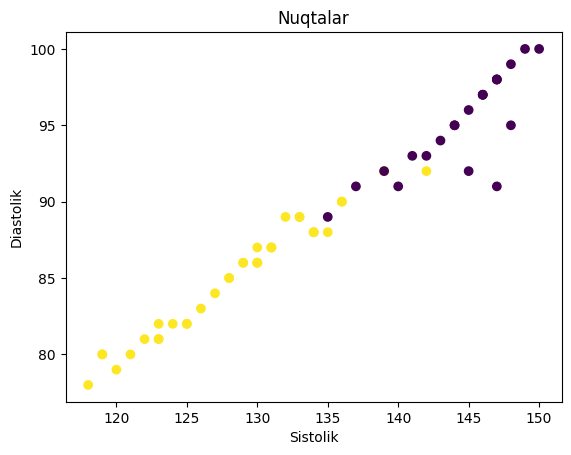

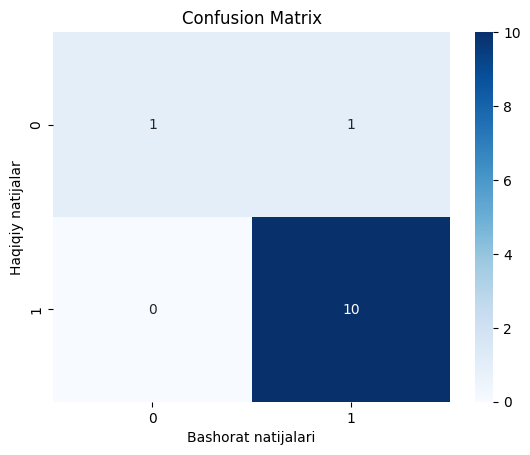

In [4]:
#                                           SVM
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# CSV faylini o'qish
data = pd.read_csv('data.csv')

# X va y larni ajratib olish
X = data.drop('sinf', axis=1)
y = data['sinf']

# Ma'lumotlarni trenirovka va test qismiga ajratib olish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Machine (SVM) modelini yaratish va o'qitish
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

# Test ma'lumotlari uchun bashorat
y_pred = model.predict(X_test)

# Aniqlikni hisoblash
accuracy = accuracy_score(y_test, y_pred)
print(f'Test ma\'lumotlari uchun aniqlik: {accuracy:.4f}')


plt.scatter(data['Sistolik'], data['Diastolik'], c=data['sinf'], cmap='viridis')
plt.title('Nuqtalar')
plt.xlabel('Sistolik')
plt.ylabel('Diastolik')
plt.show()

# Konfuziya matricasini o'qish va ko'rsatish
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel('Haqiqiy natijalar')
plt.xlabel('Bashorat natijalari')
plt.title('Confusion Matrix')
plt.show()